In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import itertools

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

In [34]:
import numpy
import os
import re
import binascii
from time import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [35]:
# load data
with open("C:/Users/shohidul//Desktop/groceries.csv", 'r') as nodecsv: # Open the file                       
    nodereader = csv.reader(nodecsv) # Read the csv  
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader]
    node_names = [n for n in nodes]

In [36]:
list2 = [
    word
        for sublist in nodes
        for sentence in sublist
        for word in sentence.split()
]
#print(list2)

In [37]:
list2=list2[:100]

In [38]:
edges = [(p1, p2) for p1 in list2 for p2 in list2 if p1 != p2]

In [39]:
G = nx.Graph()
G.add_nodes_from(list2)
G.add_edges_from(edges)

In [40]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 56
Number of edges: 1540
Average degree:  55.0000


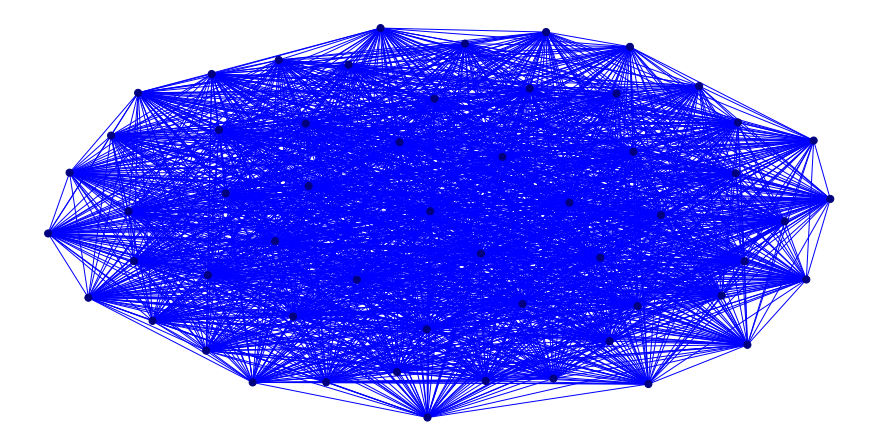

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]


# show graph
node_degrees_1 = nx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

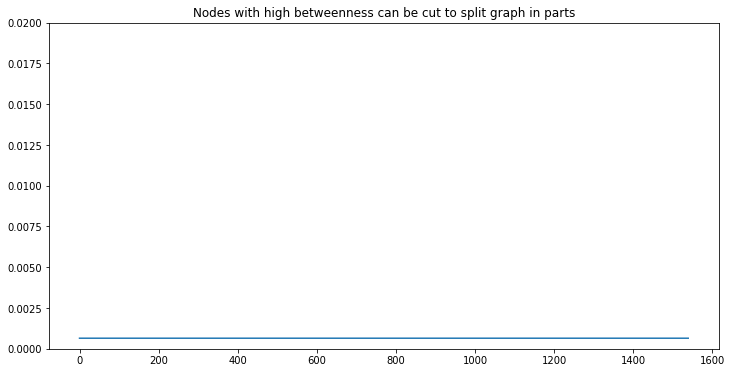

In [42]:
# print betweenness
bt = list(nx.edge_betweenness(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
plt.ylim([0, 0.02])
plt.show()

In [43]:
# remove edges with betweenness larger than threshold
thr = 0.01
while True:
    bt = nx.edge_betweenness(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(nx.degree(G)):
    if d == 0:
        G.remove_node(n)

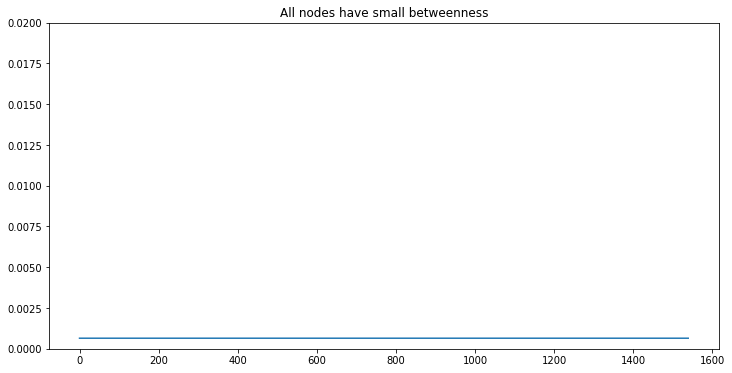

In [44]:
# print new betweenness
bt = nx.edge_betweenness(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.02])
plt.show()

In [45]:
nx.__version__

'2.3'

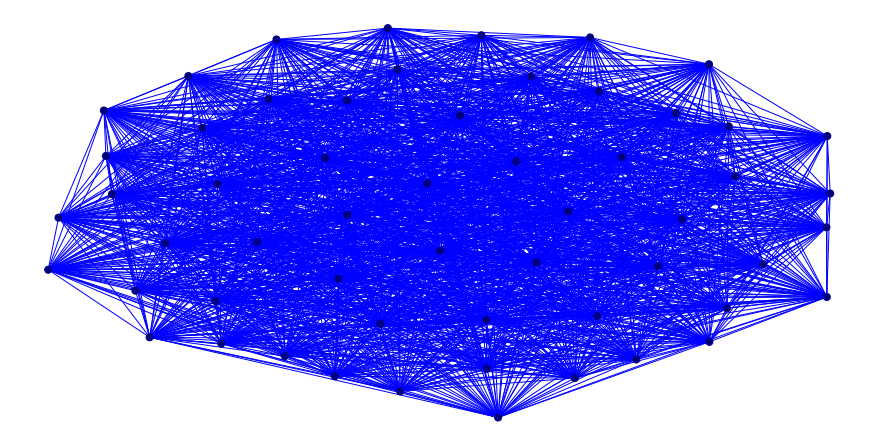

In [46]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(nx.degree(G1)).values())
    nx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

In [47]:
print(nx.triangles(G))

{'citrus': 1485, 'fruit': 1485, 'semi-finished': 1485, 'bread': 1485, 'margarine': 1485, 'ready': 1485, 'soups': 1485, 'tropical': 1485, 'yogurt': 1485, 'coffee': 1485, 'whole': 1485, 'milk': 1485, 'pip': 1485, 'cream': 1485, 'cheese': 1485, 'meat': 1485, 'spreads': 1485, 'other': 1485, 'vegetables': 1485, 'condensed': 1485, 'long': 1485, 'life': 1485, 'bakery': 1485, 'product': 1485, 'butter': 1485, 'rice': 1485, 'abrasive': 1485, 'cleaner': 1485, 'rolls/buns': 1485, 'UHT-milk': 1485, 'bottled': 1485, 'beer': 1485, 'liquor': 1485, '(appetizer)': 1485, 'potted': 1485, 'plants': 1485, 'cereals': 1485, 'white': 1485, 'water': 1485, 'chocolate': 1485, 'curd': 1485, 'flour': 1485, 'dishes': 1485, 'beef': 1485, 'frankfurter': 1485, 'soda': 1485, 'chicken': 1485, 'sugar': 1485, 'fruit/vegetable': 1485, 'juice': 1485, 'newspapers': 1485, 'packaged': 1485, 'fruit/vegetables': 1485, 'specialty': 1485, 'bar': 1485, 'pastry': 1485}


In [17]:
cliq_list = list(nx.clique.enumerate_all_cliques(G))
triangle_list = [ x for x in cliq_list if len(x)==3]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\shohidul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-71ccf4dae00e>", line 1, in <module>
    cliq_list = list(nx.clique.enumerate_all_cliques(G))
  File "C:\Users\shohidul\Anaconda3\lib\site-packages\networkx\algorithms\clique.py", line 98, in enumerate_all_cliques
    filter(nbrs[u].__contains__,
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\shohidul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3329, in run_code
    sys.excepthook = old_excepthook
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\shohidul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value.

KeyboardInterrupt: 

In [ ]:
print(triangle_list)

In [48]:
L = nx.laplacian_matrix(G).toarray()

In [59]:
L

array([[55, -1, -1, ..., -1, -1, -1],
       [-1, 55, -1, ..., -1, -1, -1],
       [-1, -1, 55, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., 55, -1, -1],
       [-1, -1, -1, ..., -1, 55, -1],
       [-1, -1, -1, ..., -1, -1, 55]], dtype=int32)

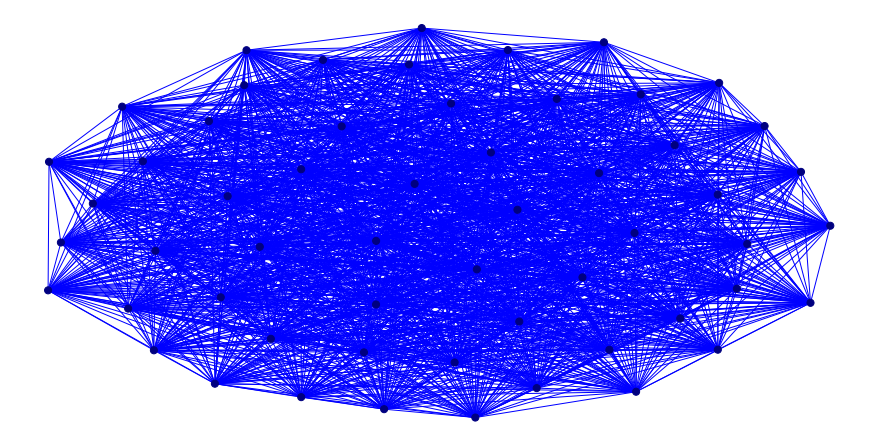

In [60]:
# show graph
node_degrees = list(dict(nx.degree(G)).values())
nx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

In [50]:
# find eigenvectors of Laplacian matrix,
# take second smallest and third smallest
u,s,v = np.linalg.svd(L)
ev2 = u[:, -2]
ev3 = u[:, -3]

In [51]:
u.shape

(56, 56)

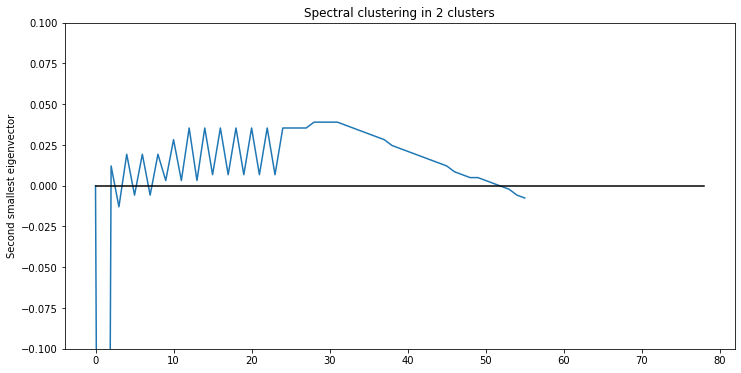

In [62]:
# print second smallest eigenvector
plt.plot(ev2)
plt.ylim([-0.1, 0.1])
plt.plot([0, 78], [0, 0], '-k')
plt.title("Spectral clustering in 2 clusters")
plt.ylabel("Second smallest eigenvector")
plt.show()

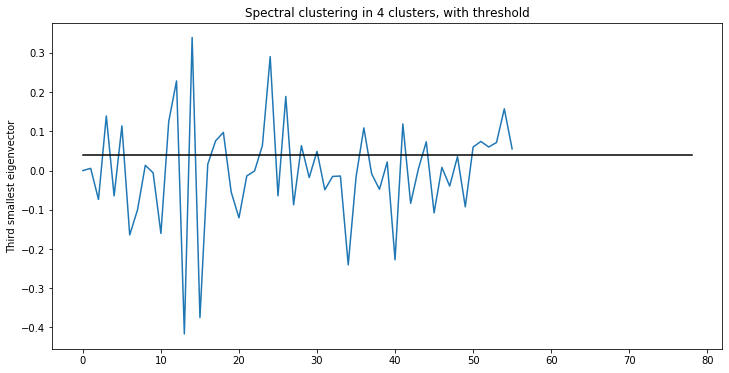

In [63]:
# print third smallest eigenvector
plt.plot(ev3)
plt.plot([0, 78], [0.04, 0.04], '-k')
plt.title("Spectral clustering in 4 clusters, with threshold")
plt.ylabel("Third smallest eigenvector")
plt.show()

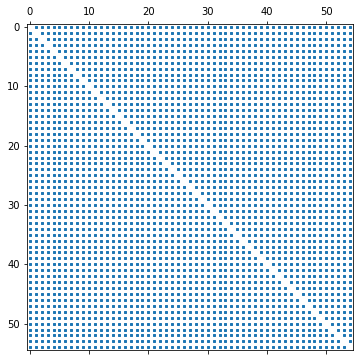

In [64]:
# adjacency matrix of un-ordered graph
N = 55
ix = np.arange(N)
np.random.shuffle(ix)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

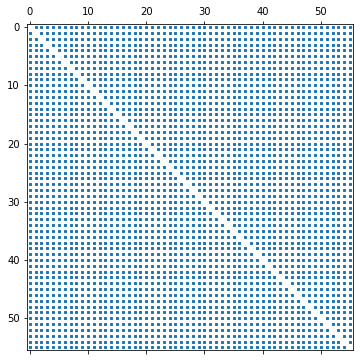

In [55]:
# adjacency matrix ordered by 2nd smallest eigenvector
ix = np.argsort(ev2)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

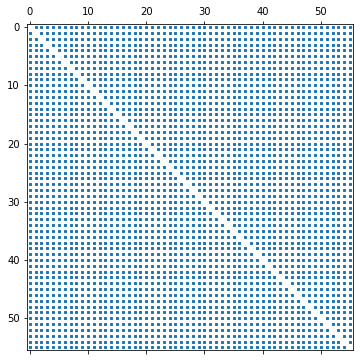

In [56]:
# adjacency matrix ordered by 3rd smallest eigenvector
ix = np.argsort(ev3)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

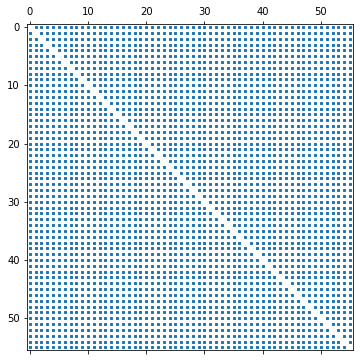

In [57]:
# ideal adjacency matrix (from the original dataset)
A = nx.adjacency_matrix(G)
plt.spy(A, markersize=2.0)

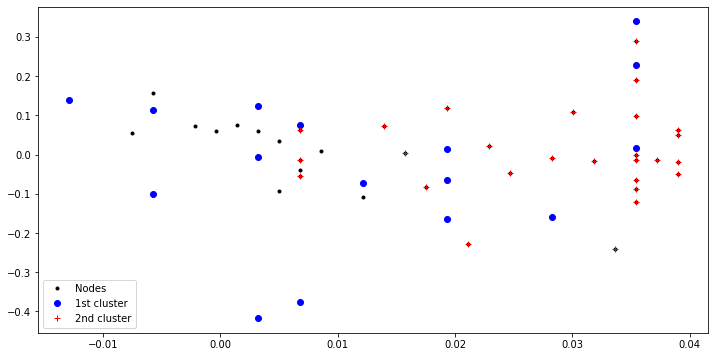

In [58]:
# graph shown in coordinates of two last eigenvectors
vert = dict(nx.degree(G)).keys()
plt.plot(ev2[2:], ev3[2:], '.k')
plt.plot(ev2[2:18], ev3[2:18], 'ob')
plt.plot(ev2[18:45], ev3[18:45], '+r')
plt.legend(['Nodes', '1st cluster', '2nd cluster'], loc=3)
plt.show()